<a href="https://colab.research.google.com/github/panaitealexandra/PMP-2024/blob/main/Laborator8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytensor==2.26.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.8.10
    Uninstalling pytensor-2.8.10:
      Successfully uninstalled pytensor-2.8.10


In [3]:
!pip install --upgrade pymc


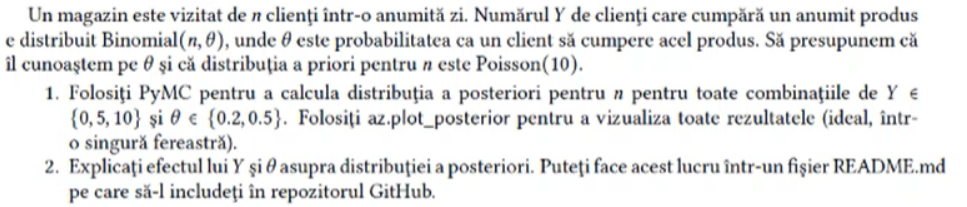

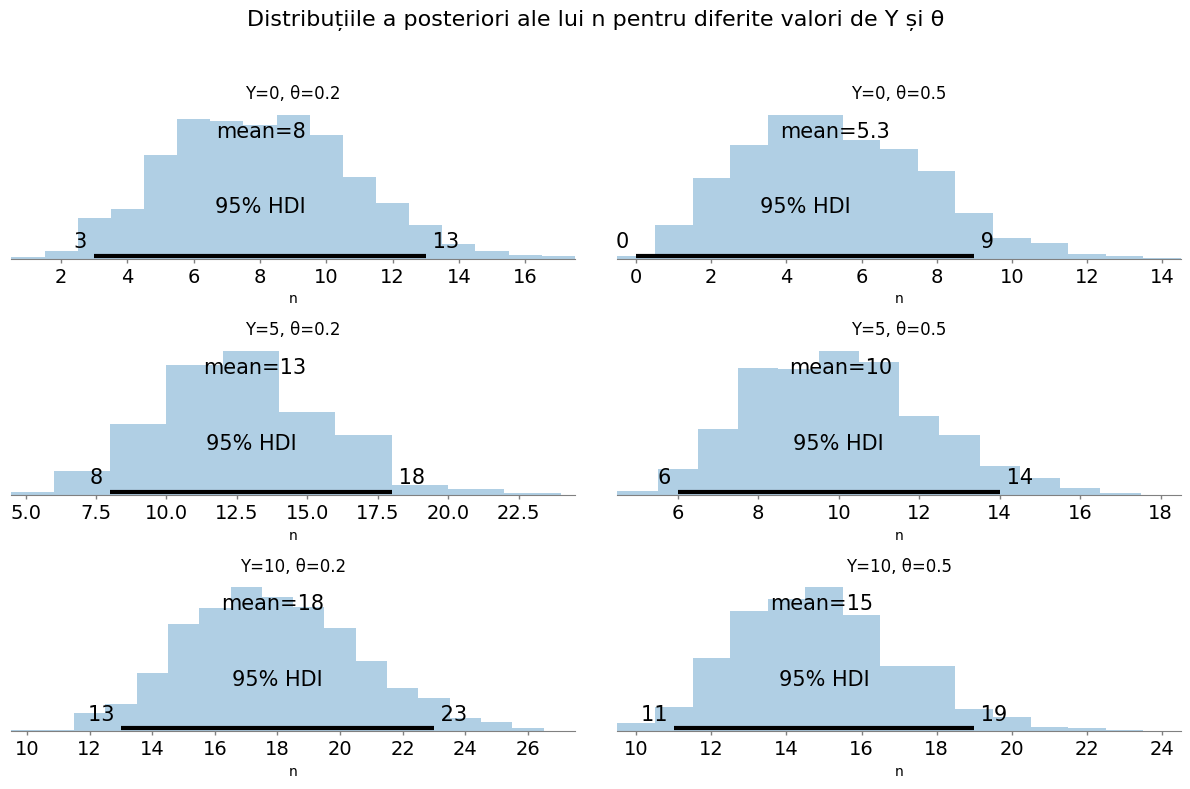

In [4]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

Y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8))
fig.suptitle("Distribuțiile a posteriori ale lui n pentru diferite valori de Y și θ", fontsize=16)

for i, Y in enumerate(Y_values):
    for j, theta in enumerate(theta_values):
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10)

            Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)

            trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=1, progressbar=False)

        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j], hdi_prob=0.95)
        axes[i, j].set_title(f"Y={Y}, θ={theta}")
        axes[i, j].set_xlabel("n")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()